# SF-DAT-21 | Unit Project 2

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

### Step 1: Load the python libraries you will need for this project

In [171]:
# imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
%matplotlib inline

pd.set_option('display.max_rows', 500)


### Step 2: Read in your data set

In [172]:
# read in data from source
df_raw = pd.read_csv("../../dataset/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


# Questions
## Question 1. How many observations are in our dataset?


In [77]:
len(df_raw)

400

Answer: 400 observations

## Question 2. Create a summary table.

In [78]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [79]:
df_raw.mode() #for my own interest to find out

,admit,gre,gpa,prestige
0,0,620.0,4.0,2.0


In [80]:
df_raw.median()  #for my own interest to find out

admit         0.000
gre         580.000
gpa           3.395
prestige      2.000
dtype: float64

## Question 3. Why would GRE have a larger STD than GPA?

Answer: 

GRE have a larger STD than GPA because the value that we're looking at is varied from 220-800 as oppose to 1-4. However, when I calculated both to see how they are relative to the respective max, the GRE % almost doubled the GPA (GPA @ 7.5% vs GRE @ 14.45%). 

My guess is because a student can retake their GRE to get the maximum scores they 'think' they can get (some might even get 800 on their Nth tries) and submit while their GPA remains constant, and this in turn allows more students to score higher while the ones who are doing poorly are probably due to unpreparedness or other unfortunate reasons, which might be the cause of our STD to be higher than the GPA...


580.0

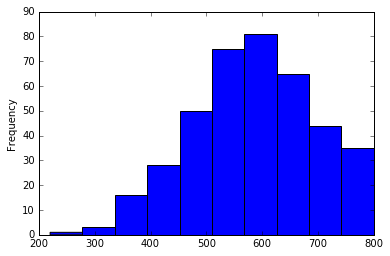

In [81]:
df_raw['gre'].plot(kind = 'hist')
df_raw['gre'].median() #for my own interest to find out

3.395

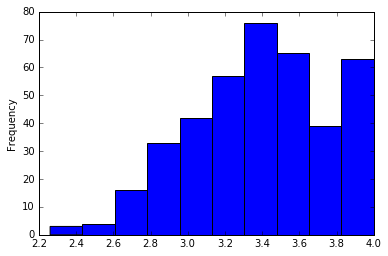

In [168]:
df_raw['gpa'].plot(kind = 'hist')
df_raw['gpa'].median() #for my own interest to find out

## Question 4. Drop data points with missing data.


In [173]:
df_raw.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [174]:
print df_raw.count()
df_raw.dropna(inplace=True) #dropping 3 rows with NA
print df_raw.dropna().count() #now there are no 3 rows with NA
len(df_raw)

admit       400
gre         398
gpa         398
prestige    399
dtype: int64
admit       397
gre         397
gpa         397
prestige    397
dtype: int64


397

In [175]:
len(df_raw.dropna())

397

In [176]:
missing = len(df_raw) - len(df_raw.dropna())
missing

0

## Question 5. Confirm that you dropped the correct data.  How can you tell?

Answer: I checked against the .isnull() and .dropna(), and ensure that I'm only dropping the NULL row(s) with .dropna() -- in return, I get 397

## Question 6. Create box plots for GRE and GPA.

580.0

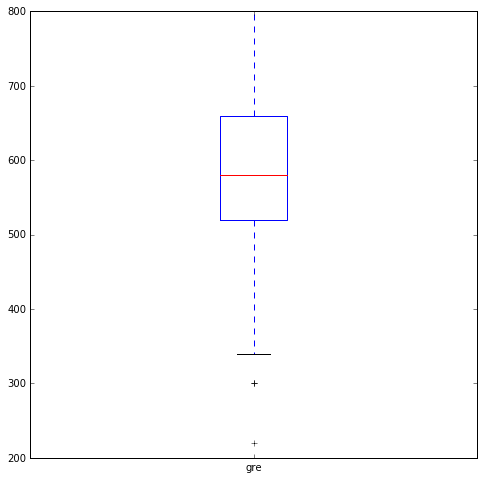

In [87]:
df_raw['gre'].plot(kind = 'box', figsize = (8,8))
df_raw['gre'].median()

3.4

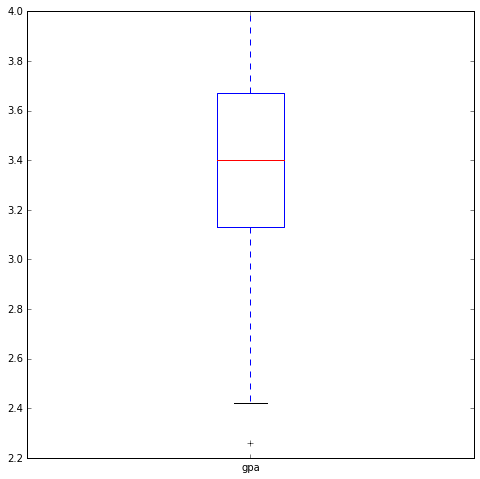

In [179]:
df_raw['gpa'].plot(kind = 'box', figsize = (8,8))
df_raw['gpa'].median()

## Question 7. What do this plots show?

Answer: GPA and GRE are "roughly" symmetrical with GRE having two outliers and GPA with one outlier.

## Question 8. Describe each distribution.

-0.21688893296924305

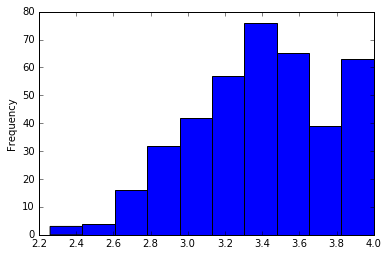

In [89]:
# plot the distribution of each variable
df_raw.gpa.plot.hist()
df_raw['gpa'].skew()

GPA seems to be negatively skewed, which shows a lot of students seems pretty motivated in school.

-0.21688893296924305

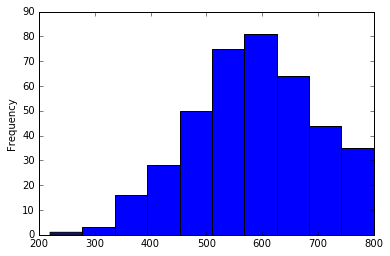

In [90]:
df_raw.gre.plot.hist()
df_raw['gpa'].skew()

GRE seems to also be SLIGHTLY negatively skewed, which sort of indicate that there seems to be a lot of higher mid-range scores students who've applied to the UCLA grad school

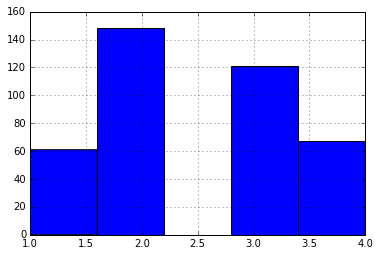

In [91]:
#df_raw.prestige.plot.hist(xlabelsize = 1)
from pandas import Series
Series.hist(df_raw.prestige, bins = 5)

Prestige seems slightly positively skewed, which seems to me that a lot of 2nd and 3rd prestige students applied to the UCLA grad school

## Question 9. If our model had an assumption of a normal distribution would we meet that requirement?

Answer: I believe so; our GPA and GRE seemed to me to be almost meeting the normal distribution requirements if it were not due to the outlier(s); even prestige seemed roughly symetrical even though slightly positively skewed

## Question 10. Does this distribution need correction?  If so, why?  How?

Answer: Yes more sample would be nice, and we should remove the outliers. Why? The more sample, the better likely our data to be more representative to what's likely to be 'true', and the reason why removing outliers will help is because without them, my gues is that we should be able to find out whether our data is actually roughly normally distributed or 'positively' distributed. How will I correct it? Find the Q1, Q3, use the correct formula, and drop the outliers. For getting more sample, I would say to get more dataset from previous years (if provided) from the UCLA website.

## Question 11. Which of our variables are potentially colinear?

In [177]:
# create a correlation matrix for the data
df_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


## Question 12. What did you find?

Answer: GPA and GRE is somewhat correlated, and Prestige and Admit is slightly negatively correlated, which is odd... GPA and prestige almost have no correlation at all.

## Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of undergraduate schools.

Answer:
- We will be using the two dataset columns: 'Prestige'(1-4) and 'Admit' (0,1).
- We'll be using .corr(), .describe(), .median(), and .mode() to get a full picture.
- Find out if there are any missing values and drop them, then find the total observations after drop
- Find out whether or not getting into a prestige college will increase the likelihood of getting into UCLA Grad program.
- Present the findings to review whether the original hypothesis is correct/false

## Question 14. What is your hypothesis?

Answer: Prestige almost does not seem to have any association with admittance to UCLA. (Weak correlation)

## Bonus/Advanced

## 1. Bonus: Explore alternatives to dropping obervations with missing data.

Instead of dropping the missing data, you could simply try to use the data previously known OR using the "multiple imputation" method, that takes in a randomly selected similar record of students and 'impute' the missing data.

## 2. Bonus: Log transform the skewed data.


In [195]:
gpa_skew = df_raw.gpa
gre_skew = df_raw.gre
prestige_skew = df_raw.prestige
#sqrt_transformed = gre_skew.apply(np.sqrt) # Get the square root of data points*

#sqrt_transformed.hist(figsize=(8,8))     # Plot histogram                 

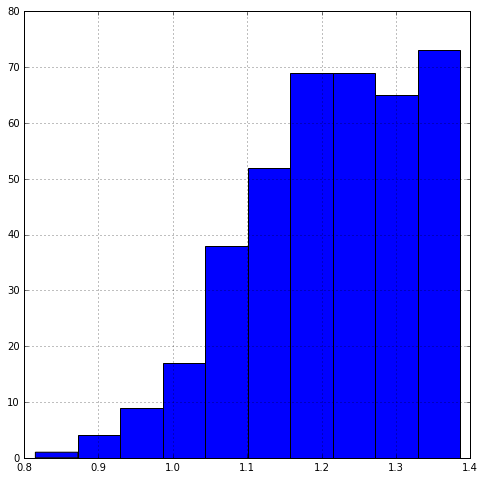

In [210]:
log_gpa = (gpa_skew).apply(np.log)   # Get the log of the data

log_gpa.hist(figsize = (8,8))         # Plot histogram             

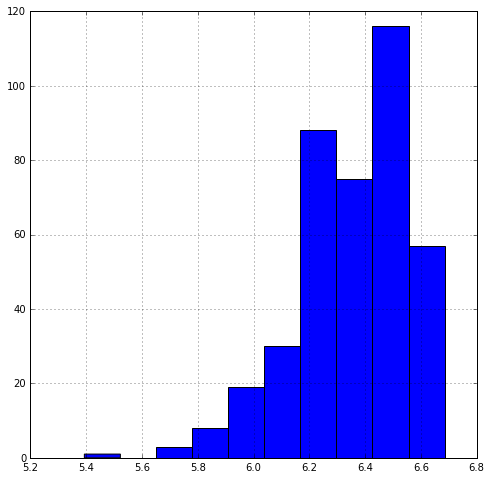

In [211]:
log_gre = (gre_skew).apply(np.log)   # Get the log of the data

log_gre.hist(figsize = (8,8))         # Plot histogram             

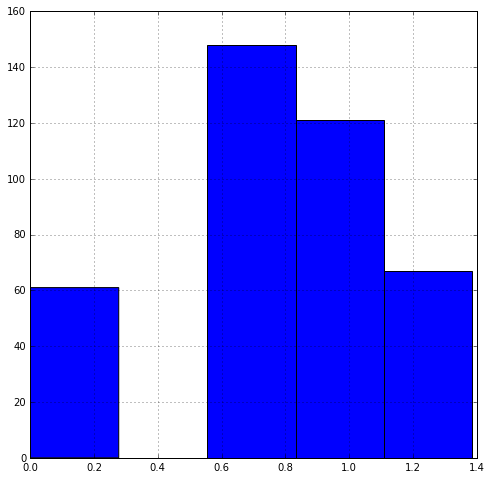

In [213]:
log_prestige = (prestige_skew).apply(np.log)   # Get the log of the data

log_prestige.hist(figsize = (8,8), bins= 5)         # Plot histogram             

## 3. Advanced: Impute missing data.

Using .fillna()? with non-null values forward or backward, in this case bfill?

bfill(df_raw) or df_raw.fillna(method = 'bfill')?